In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from src import helper

plt.style.use('ggplot') # check out some other plot styles!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initial look at our data

In [105]:
crime = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
crime.head(10)
crime.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'DELETE - Fire Prevention Districts', 'DELETE - Police Districts',
       'DELETE - Supervisor Districts', 'DELETE - Zip Codes',
       'DELETE - Neighborhoods', 'DELETE - 2017 Fix It Zones',
       'Civic Center Harm Reduction Project Boundary',
       'Fix It Zones as of 2017-11-06 ', 'DELETE - HSOC Zones',
       'Fix It Zones as of 2018-02-07',
       'CBD, BID and GBD Boundaries as of 2017',
       'Areas of Vulnerability, 2016', 'Central Market/Tenderloin Boundary',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces'],
      dtype='object')

In [81]:
#Top 10 and bottom 10 police reports from 2003-2017
crime.groupby('Descript').count().sort_values(by='Category', ascending=False)['Category'].head(10)

Descript
GRAND THEFT FROM LOCKED AUTO             178836
LOST PROPERTY                             77956
BATTERY                                   67654
STOLEN AUTOMOBILE                         64763
DRIVERS LICENSE, SUSPENDED OR REVOKED     62534
AIDED CASE, MENTAL DISTURBED              56313
WARRANT ARREST                            56230
SUSPICIOUS OCCURRENCE                     52490
PETTY THEFT FROM LOCKED AUTO              51946
PETTY THEFT OF PROPERTY                   46114
Name: Category, dtype: int64

In [82]:
crime.groupby('Descript').count().sort_values(by='Category', ascending=False)['Category'].tail(10)

Descript
FALSE REPRESENTATION TO SECONDHAND DEALER                 1
REFUSAL TO IDENTIFY                                       1
TRANSPORTATION OF OPIUM DERIVATIVE                        1
TRANSPORTATION OF OPIUM                                   1
PUBLIC UTILITY INFORMATION, FRAUDULENTLY OBTAINING        1
EMBEZZLEMENT, PETTY THEFT BY COLLECTOR                    1
VETERAN OR EX-SERVICEMAN, FALSE REPRESENTATION AS         1
ENCOURAGE MINOR TO USE HALLUCINOGENIC                     1
DISTURBANCE OF NON-RELIGIOUS, NON-POLITICAL ASSEMBLY      1
HARASSING CHILD OR WARD BECAUSE OF PERSON'S EMPLOYMENT    1
Name: Category, dtype: int64

# Analysis and plotting from data extracted from sfcrime database

First, let's get all our data

In [32]:
# Read in all our data
crime_2003 = pd.read_csv('data/2003.csv')
crime_2004 = pd.read_csv('data/2004.csv')
crime_2005 = pd.read_csv('data/2005.csv')
crime_2006 = pd.read_csv('data/2006.csv')
crime_2007 = pd.read_csv('data/2007.csv')
crime_2008 = pd.read_csv('data/2008.csv')
crime_2009 = pd.read_csv('data/2009.csv')
crime_2010 = pd.read_csv('data/2010.csv')
crime_2011 = pd.read_csv('data/2011.csv')
crime_2012 = pd.read_csv('data/2012.csv')
crime_2013 = pd.read_csv('data/2013.csv')
crime_2014 = pd.read_csv('data/2014.csv')
crime_2015 = pd.read_csv('data/2015.csv')
crime_2016 = pd.read_csv('data/2016.csv')
crime_2017 = pd.read_csv('data/2017.csv')

auto_crime = pd.read_csv('data/auto_crime.csv')
auto_crime
mission_crime = pd.read_csv('data/mission_crime.csv')
mission_crime

crime_years = [crime_2003, crime_2004, crime_2005, crime_2006, crime_2007, crime_2008, 
               crime_2009, crime_2010, crime_2011, crime_2012, crime_2013, crime_2014, 
               crime_2015, crime_2016, crime_2017]

years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016', '2017']

## Looking at violent vs non-violent crime
Is violent crime resolved at a higher rate than non-violent crime?

No handles with labels found to put in legend.
No handles with labels found to put in legend.


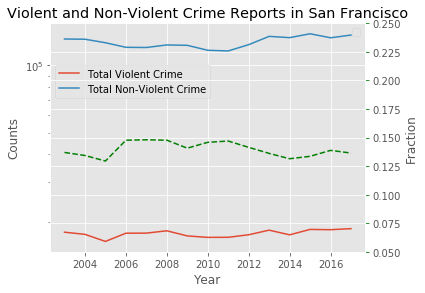

In [112]:
# Look at overall crime rate
mission_crime['Total Violent Crime'] = mission_crime['viol_in_mission'] + mission_crime['viol_ex_mission']

mission_crime['Total Non-Violent Crime'] = mission_crime['nonviol_in_mission'] + mission_crime['nonviol_ex_mission']

mission_crime['Ratio'] = mission_crime['Total Violent Crime']/mission_crime['Total Non-Violent Crime']

#Plot the data
helper.plotter_onegraph(mission_crime, 'year', 
                        ['Total Violent Crime','Total Non-Violent Crime'],
                        'Ratio')

plt.title('Violent and Non-Violent Crime Reports in San Francisco')
plt.savefig('crime_in_sf.png', dpi=350)



In [143]:
# Resolution of crimes
#plt.plot(auto_crime['year'], auto_crime['total_resolved_ct']/auto_crime['total_crime_ct'])

# Pull out violent vs non-violent crime
results = pd.DataFrame()
vres = []
nres = []

for year, data in zip(years, crime_years):
    vfrac, nvfrac = helper.vresolution(data)
    vres.append(vfrac)
    nres.append(nvfrac)


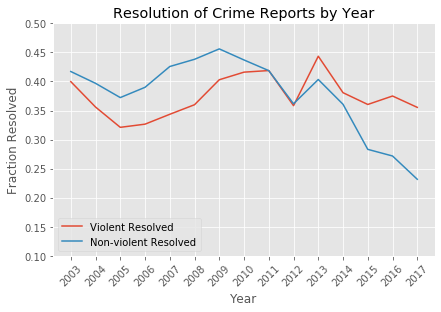

In [157]:
vres = pd.Series(vres)
nres = pd.Series(nres)

resolved = pd.DataFrame({'Year': pd.Series(years), 'Violent Resolved': vres, 'Non-violent Resolved': nres})
resolved

helper.plotter_onegraph(resolved, 'Year', ['Violent Resolved', 'Non-violent Resolved'])
plt.ylabel('Fraction Resolved')
plt.title('Resolution of Crime Reports by Year')
plt.xticks(rotation=45)
plt.ylim(0.1, 0.5)
plt.savefig('resolution.png', dpi=350)
plt.show()

## Theft from cars from 2003-2017

My hypothesis is that thefts from cars will increase > 10% after 2014 relative to the years before 2014. 

That hypothesis seems to only be partially correct: thefts from cars started increasing ~2011 and continued to increase almost every year after that. 

How to quantify this? Calculate average car theft rate from 2003-2014 (mean and std) and compare to 2015-2017? 

Index(['Unnamed: 0', 'year', 'total_crime_ct', 'car_theft_petty_ct',
       'car_theft_grand_ct', 'car_theft_tot_ct', 'car_theft_fraction',
       'total_resolved_ct', 'petty_resolve_ct', 'grand_resolved_ct',
       'car_resolved_fraction', 'diff'],
      dtype='object')

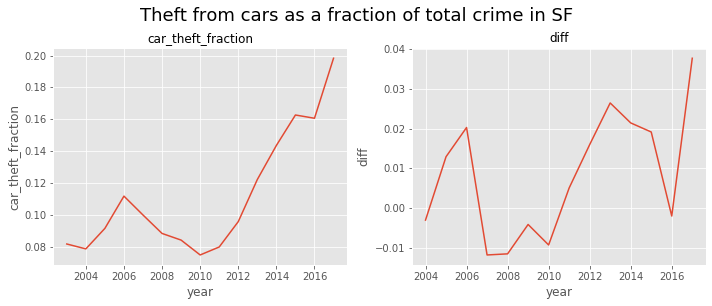

In [8]:
# Plot thefts from cars as a fraction of total crime
title = "Theft from cars as a fraction of total crime in SF"
helper.plotter(auto_crime, 'year', ['car_theft_fraction', 'diff'], title=title)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


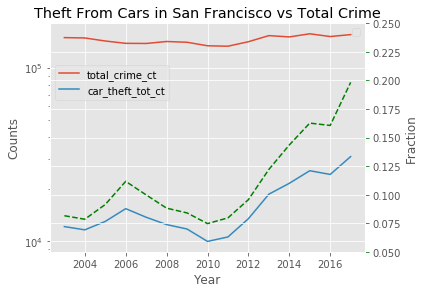

In [113]:
# Plot total crime, total thefts, and fraction all on one plot
helper.plotter_onegraph(auto_crime, 'year', ['total_crime_ct','car_theft_tot_ct'],
                                            'car_theft_fraction')
plt.title('Theft From Cars in San Francisco vs Total Crime')
plt.savefig('car_theft_log.png', dpi=350)


## Looking at violent and non-violent crime in the Mission


My hypothesis was that violent crime in the Mission would decrease due to gentrification. I define the period of gentrification as 2012 onwards (strongest during the post recession recovery). 
My hypothesis is clearly wrong.

- Not only did violent crime stay relatively flat, non-violent crime decreased. 
- Violent crime a larger percentage of total crime. 
- We see the opposite trend outside of the mission: non-violent crime increased.
- Violent crime is a lower percentage of total crime outside the Mission. 

How to quantify this?

Calculate the mean crime rate pre 2012 vs post 2012?


In [46]:
mission_crime['fraction_viol_mision']

,year,total_crimes,crimes_in_mission,viol_in_mission,nonviol_in_mission,viol_ex_mission,nonviol_ex_mission,fraction_viol_mision,fraction_viol_exmission,diff_mission,diff_all
0,2003,149176,8976,1008,7968,16967,123233,0.11230,0.12050,NaN,NaN
1,2004,148471,8906,1085,7821,16497,123068,0.12183,0.11842,0.00953,-0.00208
2,2005,142591,8523,999,7524,15349,118719,0.11721,0.11465,-0.00462,-0.00377
3,2006,138247,8298,1094,7204,16698,113251,0.13184,0.12870,0.01463,0.01405
4,2007,138006,8260,1068,7192,16735,113011,0.12930,0.12900,-0.00254,0.00030
5,2008,141670,9019,1170,7849,17066,115585,0.12973,0.12872,0.00043,-0.00028
6,2009,140215,8441,1088,7353,16212,115562,0.12889,0.12338,-0.00084,-0.00534
7,2010,133868,8009,934,7075,16107,109752,0.11662,0.12730,-0.01227,0.00392
8,2011,133094,7662,978,6684,16078,109354,0.12764,0.12815,0.01102,0.00085
9,2012,141267,7718,1107,6611,16401,117148,0.14343,0.12394,0.01579,-0.00421


No handles with labels found to put in legend.
No handles with labels found to put in legend.


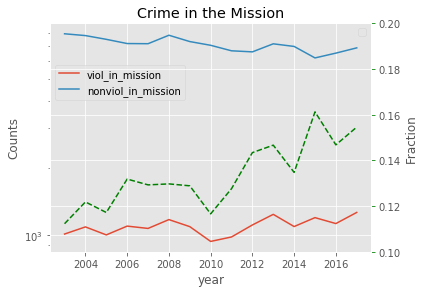

<Figure size 432x288 with 0 Axes>

In [52]:
# Digging in a little more to look at absolute numbers
helper.plotter_onegraph(mission_crime, 'year', ['viol_in_mission', 'nonviol_in_mission'], 'fraction_viol_mision')
plt.title("Crime in the Mission")
plt.show()
plt.savefig('missioncrime.png', dpi=350)

# Now looking at time of day for crimes to be committed

Below are the data for crime by time of day. No distinguishing between violent and non-violent crime. 

Time ranges from 0 (midnight) to 23 (11:00 pm).

My hypothesis is that more crime is committed bewteen 8pm and midnight. I could change the hypothesis to say that crime by time of day DOES NOT follow a uniform distribution:

- H0: Crime rate per hour of the day follows a discrete uniform distribution.

- HA: Crime rate doesn't follow a discrete uniform distribution. 





In [78]:
crimetime = pd.read_csv('data/crimetime.csv')
crimetime

,year,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2003,6785,3937,3519,2288,1572,1326,2104,3815,5844,...,7508,8049,8318,9107,9722,8563,7574,7553,7954,7558
1,2004,7308,3966,3382,2227,1565,1426,2152,3869,5932,...,7790,7847,8096,9112,9398,8058,7446,7551,8007,7485
2,2005,6993,3965,3391,2230,1637,1377,2135,3817,5964,...,7156,7495,7847,8797,8876,8007,7132,7032,7560,7095
3,2006,7001,3941,3431,2166,1486,1405,1998,3579,5526,...,7012,7544,7933,8357,8510,7428,6746,6695,7117,6744
4,2007,6851,4101,3449,2110,1516,1364,2065,3419,5259,...,7224,7459,7754,8424,8558,7617,6969,6834,7328,6702
5,2008,7626,4275,3625,2249,1617,1322,2252,3730,5310,...,7697,8060,8356,8753,8557,7517,7014,6742,7072,6738
6,2009,7648,4479,3947,2258,1602,1130,2239,3808,5298,...,7468,7767,8000,8198,8431,7238,6732,6706,7265,6526
7,2010,7501,4182,3555,2124,1475,1224,2008,3322,4825,...,6557,7314,7652,8157,8286,7682,6993,6479,7046,6609
8,2011,7831,4235,3608,2113,1500,1454,1998,3044,5003,...,6613,7155,7554,8002,8180,7283,6889,6440,6833,6727
9,2012,7790,4606,3588,2302,1579,1480,2139,3186,5035,...,6954,7845,8217,8752,9200,8152,7283,7047,7397,6634


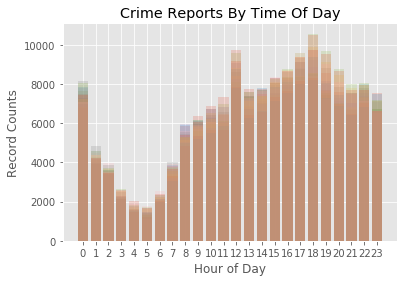

In [172]:
#plt.bar(crimetime['year'],height=crimetime['0'])
labels = list(crimetime.columns)[1:]
for i in range(15):
    plt.bar(labels, height=list(crimetime.iloc[i,1:]), alpha=0.2, label=crimetime.iloc[i, 0])
plt.title("Crime Reports By Time Of Day")
plt.xlabel('Hour of Day')
plt.ylabel('Record Counts')
plt.savefig('time_of_day.png', dpi=350)
plt.show()


## Day of Week!


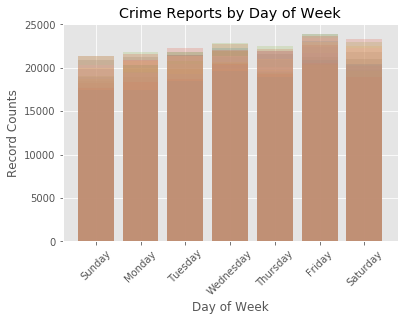

In [170]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
counts = []

for year, data in zip(years, crime_years):
    dayofweekct = data.groupby('DayOfWeek').count().sort_values(by='Date', ascending=False)['Date']
    counts.append([dayofweekct[day] for day in days])

counts = pd.DataFrame(np.asarray(counts), columns=days)
counts['Year'] = years

for i in range(15):
        plt.bar(days, height=list(counts.iloc[i,:7]), alpha=0.2)
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.title("Crime Reports by Day of Week")
plt.ylabel('Record Counts')
plt.savefig(f'dayofweek{0}.png', dpi=350)
plt.show()

# Unused code and raw copies

In [ ]:
# mission_crime = helper.calculate_diff(crime_mission, 'fraction_viol_mision', 'diff_mission')
# mission_crime2 = helper.calculate_diff(mission_crime, 'fraction_viol_exmission', 'diff_all')
# auto_crime = helper.calculate_diff(crime_pd, 'car_theft_fraction')
# auto_crime

In [27]:
auto_crime_data = [
 ['2003', 149176, 5276, 6895, 12171, 0.08159, 61933, 138, 179, 0.00512],
 ['2004', 148471, 4922, 6735, 11657, 0.07851, 58232, 137, 161, 0.00512],
 ['2005', 142591, 4045, 8989, 13034, 0.09141, 52282, 79, 129, 0.00398],
 ['2006', 138247, 4604, 10835, 15439, 0.11168, 52823, 156, 158, 0.00594],
 ['2007', 138006, 3578, 10196, 13774, 0.09981, 57347, 138, 211, 0.00609],
 ['2008', 141670, 3225, 9273, 12498, 0.08822, 60706, 77, 204, 0.00463],
 ['2009', 140215, 2587, 9197, 11784, 0.08404, 63067, 66, 181, 0.00392],
 ['2010', 133868, 1697, 8301, 9998, 0.07469, 58162, 80, 93, 0.00297],
 ['2011', 133094, 1719, 8890, 10609, 0.07971, 55727, 84, 136, 0.00395],
 ['2012', 141267, 3058, 10456, 13514, 0.09566, 51030, 100, 68, 0.00329],
 ['2013', 153166, 4126, 14578, 18704, 0.12212, 62496, 170, 74, 0.0039],
 ['2014', 150518, 4232, 17375, 21607, 0.14355, 54631, 139, 76, 0.00394],
 ['2015', 156927, 4968, 20562, 25530, 0.16269, 45798, 134, 74, 0.00454],
 ['2016', 151297, 4590, 19714, 24304, 0.16064, 42921, 122, 69, 0.00445],
 ['2017', 155254, 5114, 25685, 30799, 0.19838, 38148, 145, 109, 0.00666]]

auto_crime_columns = ['year', 'total_crime_ct', 'car_theft_petty_ct', 
                      'car_theft_grand_ct', 'car_theft_tot_ct', 'car_theft_fraction',
                      'total_resolved_ct', 'petty_resolve_ct', 'grand_resolved_ct', 
                      'car_resolved_fraction']

In [28]:
mission_crime_by_year = [
 ['2003', 149176, 8976, 1008, 7968, 16967, 123233, 0.1123, 0.1205],
 ['2004', 148471, 8906, 1085, 7821, 16497, 123068, 0.12183, 0.11842],
 ['2005', 142591, 8523, 999, 7524, 15349, 118719, 0.11721, 0.11465],
 ['2006', 138247, 8298, 1094, 7204, 16698, 113251, 0.13184, 0.1287],
 ['2007', 138006, 8260, 1068, 7192, 16735, 113011, 0.1293, 0.129],
 ['2008', 141670, 9019, 1170, 7849, 17066, 115585, 0.12973, 0.12872],
 ['2009', 140215, 8441, 1088, 7353, 16212, 115562, 0.12889, 0.12338],
 ['2010', 133868, 8009, 934, 7075, 16107, 109752, 0.11662, 0.1273],
 ['2011', 133094, 7662, 978, 6684, 16078, 109354, 0.12764, 0.12815],
 ['2012', 141267, 7718, 1107, 6611, 16401, 117148, 0.14343, 0.12394],
 ['2013', 153166, 8419, 1235, 7184, 17121, 127626, 0.14669, 0.11984],
 ['2014', 150518, 8081, 1089, 6992, 16403, 126034, 0.13476, 0.11621],
 ['2015', 156927, 7404, 1194, 6210, 17302, 132221, 0.16126, 0.11786],
 ['2016', 151297, 7649, 1123, 6526, 17319, 126329, 0.14682, 0.12189],
 ['2017', 155254, 8150, 1260, 6890, 17384, 129720, 0.1546, 0.12009]]

mission_crime_columns = ['year', 'total_crimes', 'crimes_in_mission', 
                         'viol_in_mission', 'nonviol_in_mission', 
                         'viol_ex_mission', 'nonviol_ex_mission',
                         'fraction_viol_mision', 'fraction_viol_exmission']

In [31]:
crime_by_timeofday = [
['2003',6785,3937,3519,2288,1572,1326,2104,3815,5844,6376,6739,6411,9168,7386,7508,8049,
  8318,9107,9722,8563,7574,7553,7954,7558],
 ['2004',7308,3966,3382,2227,1565,1426,2152,3869,5932,6143,6743,6812,8749,7407,7790,7847,
  8096,9112,9398,8058,7446,7551,8007,7485],
 ['2005',6993,3965,3391,2230,1637,1377, 2135, 3817, 5964,6088, 6305, 6460, 8414, 6818, 7156,
  7495, 7847, 8797, 8876, 8007, 7132, 7032, 7560, 7095],
 ['2006', 7001,3941, 3431, 2166, 1486, 1405,1998, 3579,  5526,  5947,  6277,  6057,  8635,
  6712,  7012, 7544,  7933,  8357,  8510,  7428,  6746,  6695,  7117,  6744], 
['2007',  6851,  4101,  3449,  2110,  1516,  1364,  2065,  3419,  5259,  5688,  6041,  6028,
  8392,  6854,  7224,  7459,  7754,  8424,  8558,  7617,  6969,  6834,  7328,  6702],
 ['2008',  7626,  4275,  3625,  2249,  1617,  1322,  2252,  3730,  5310,  5618,  5968,  6101,
  8114,  7357,  7697,  8060,  8356,  8753,  8557,  7517,  7014,  6742,  7072,  6738],
 ['2009',  7648,  4479,  3947,  2258,  1602,  1130,  2239,  3808,  5298,  5783,  6077,  6055,
  8384,  7176,  7468,  7767,  8000,  8198,  8431,  7238,  6732,  6706,  7265,  6526],
 ['2010',  7501,  4182,  3555,  2124,  1475,  1224,  2008,  3322,  4825,  5341,  5640,  5642,
  7837,  6417,  6557,  7314,  7652,  8157,  8286,  7682,  6993,  6479,  7046,  6609],
    ['2011',  7831,  4235,  3608,  2113,  1500,  1454,  1998,  3044,  5003,  5204,  5503,  5862,
  7814,  6249,  6613,  7155,  7554,  8002,  8180,  7283,  6889,  6440,  6833,  6727], 
    ['2012',  7790,  4606,  3588,  2302,  1579,  1480,  2139,  3186,  5035,  5324,  5734,  6037,
  8274,  6712,  6954,  7845,  8217,  8752,  9200,  8152,  7283,  7047,  7397,  6634], 
    ['2013',  8147,  4860,  3848,  2483,  1760,  1648,  2340,  4037,  5467,  6090,  6400,  6584,
  9081,  7570,  7710,  8327,  8598,  9349,  9751,  8825,  7868,  7498,  7791,  7134],
    ['2014',  7239,  4362,  3646,  2540,  1711,  1644,  2200,  3557,  5139,  5864,  6226,  6484,
  8835,  7135,  7386,  8125,  8694,  9395,  9881,  9119,  8467,  7782,  7950,  7137],
    ['2015',  8033,  4581,  3720,  2651,  1840,  1715,  2319,  3756,  5289,  6185,  6495,  6955,
  9603,  7573,  7401,  8254,  8763,  9568,  10565,  9666,  8754,  8020,  8035,  7186], 
    ['2016',  7065,  4373,  3505,  2556,  1895,  1753,  2525,  3918,  5617,  5902,  6503,  6824,
  9113,  7297,  7658,  8360,  8678,  9604,  9739,  9010,  8120,  7514,  7140,  6628],
 ['2017',  7453,  4229,  3443,  2578,  2006,  1652,  2383,  3670,  5390,  6039,  6875,  7335,
  9753,  7728,  7759,  8289,  8641,  9387,  10475,  9547,  8652,  7690,  7672,  6608]]

In [50]:
# Violence in San Francisco: Mission vs not Mission

# # Fraction of violence inside vs outside the mission
# helper.plotter_onegraph(mission_crime,'year', ['fraction_viol_mision', 
#                                                'fraction_viol_exmission'])
# plt.show()

# helper.plotter_onegraph(mission_crime, 'year', ['viol_ex_mission', 'nonviol_ex_mission'])
# plt.ylim(0, 160000)
# plt.ylabel('Counts')
# plt.title("Crime outside the Mission")
# plt.show()

# # Calculating year over year difference
# helper.plotter_onegraph(mission_crime, 'year', ['diff_mission', 'diff_all'])
# plt.show()
